In [1]:
%run ../chap07/cnn_basic_model.ipynb
%run ../chap05/dataset_flowers.ipynb
%run ../chap06/dataset_office31.ipynb

In [2]:
fd = FlowersDataset([96, 96], [96, 96, 3])
od = Office31Dataset([96, 96], [96, 96, 3])

Model flowers_model_1 train started:
    Epoch 2: cost=1.603, accuracy=0.242/0.190 (14/14 secs)
    Epoch 4: cost=1.600, accuracy=0.242/0.220 (14/28 secs)
    Epoch 6: cost=1.600, accuracy=0.242/0.220 (13/41 secs)
    Epoch 8: cost=1.600, accuracy=0.242/0.230 (12/53 secs)
    Epoch 10: cost=1.600, accuracy=0.242/0.250 (14/67 secs)
Model flowers_model_1 train ended in 67 secs:
Model flowers_model_1 test report: accuracy = 0.253, (0 secs)

Model flowers_model_1 Visualization


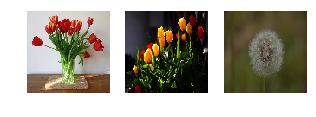

추정확률분포 [18,18,22,17,24] => 추정 dandelion : 정답 tulip => X
추정확률분포 [18,18,22,17,24] => 추정 dandelion : 정답 tulip => X
추정확률분포 [18,18,22,17,24] => 추정 dandelion : 정답 dandelion => O


In [3]:
fm1 = CnnBasicModel('flowers_model_1', fd, [30, 10])
fm1.exec_all(epoch_count = 10, report = 2)

Model flowers_model_2 train ended in 70 secs:
Model flowers_model_2 test report: accuracy = 0.253, (0 secs)

Model flowers_model_2 Visualization


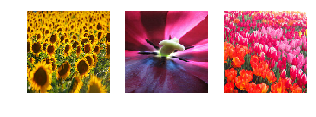

추정확률분포 [18,18,23,17,24] => 추정 dandelion : 정답 sunflower => X
추정확률분포 [18,18,23,17,24] => 추정 dandelion : 정답 tulip => X
추정확률분포 [18,18,23,17,24] => 추정 dandelion : 정답 tulip => X


In [4]:
fm2 = CnnBasicModel('flowers_model_2', fd, 
                    [['full', {'width':30}], 
                     ['full', {'width':10}]])
fm2.exec_all(epoch_count = 10)

Model flowers_model_3 train started:
    Epoch 2: cost=1.192, accuracy=0.525/0.550 (125/125 secs)
    Epoch 4: cost=0.930, accuracy=0.635/0.590 (120/245 secs)
    Epoch 6: cost=0.779, accuracy=0.704/0.610 (121/366 secs)
    Epoch 8: cost=0.652, accuracy=0.752/0.640 (120/486 secs)
    Epoch 10: cost=0.545, accuracy=0.801/0.550 (120/606 secs)
Model flowers_model_3 train ended in 606 secs:
Model flowers_model_3 test report: accuracy = 0.542, (4 secs)

Model flowers_model_3 Visualization


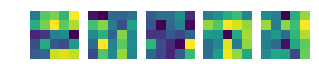

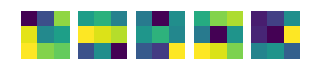

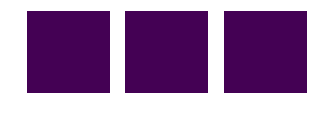

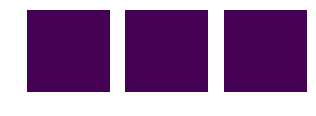

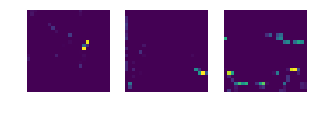

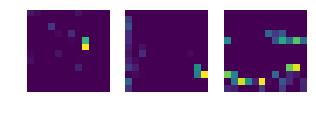

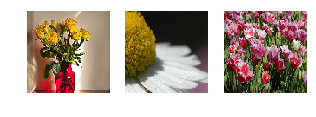

추정확률분포 [ 0, 5,95, 0, 0] => 추정 tulip : 정답 rose => X
추정확률분포 [ 0, 2, 3, 1,94] => 추정 dandelion : 정답 daisy => X
추정확률분포 [58, 0,42, 0, 0] => 추정 rose : 정답 tulip => X


In [5]:
fm3 = CnnBasicModel('flowers_model_3', fd, 
               [['conv', {'ksize':5, 'chn':6}], 
                ['max', {'stride':4}], 
                ['conv', {'ksize':3, 'chn':12}], 
                ['avg', {'stride':2}]], 
               True)
fm3.exec_all(epoch_count = 10, report = 2)

Model flowers_model_4 train ended in 442 secs:
Model flowers_model_4 test report: accuracy = 0.619, (3 secs)

Model flowers_model_4 Visualization


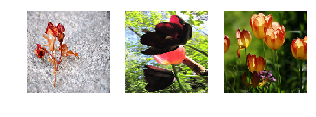

추정확률분포 [ 9,75,12, 2, 2] => 추정 daisy : 정답 rose => X
추정확률분포 [ 0,30,68, 2, 0] => 추정 tulip : 정답 tulip => O
추정확률분포 [ 7, 9,57,25, 2] => 추정 tulip : 정답 tulip => O


In [6]:
fm4 = CnnBasicModel('flowers_model_4', fd, 
               [['conv', {'ksize':3, 'chn':6}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':12}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':24}], 
                ['avg', {'stride':3}]])
fm4.exec_all(epoch_count = 10)

Model office31_model_1 train started:
    Epoch 2: cost=2.570, accuracy=0.847+0.414/0.840+0.490 (84/84 secs)
    Epoch 4: cost=1.576, accuracy=0.902+0.636/0.880+0.470 (84/168 secs)
    Epoch 6: cost=0.976, accuracy=0.933+0.772/0.910+0.560 (85/253 secs)
    Epoch 8: cost=0.550, accuracy=0.952+0.876/0.900+0.460 (86/339 secs)
    Epoch 10: cost=0.339, accuracy=0.963+0.930/0.910+0.550 (85/424 secs)
Model office31_model_1 train ended in 424 secs:
Model office31_model_1 test report: accuracy = 0.861+0.507, (3 secs)

Model office31_model_1 Visualization


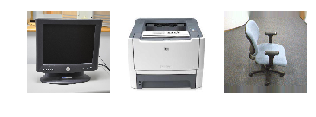

[ 도메인 추정결과 ]
추정확률분포 [ 0,52,48] => 추정 amazon : 정답 dslr => X
추정확률분포 [ 0,100, 0] => 추정 amazon : 정답 amazon => O
추정확률분포 [97, 0, 3] => 추정 webcam : 정답 webcam => O
[ 상품 추정결과 ]
추정확률분포 [ 0,30, 0, 0, 0, 0, 0, 0,...] => 추정 speaker : 정답 monitor => X
추정확률분포 [96, 0, 0, 0, 0, 0, 0, 0,...] => 추정 desk_lamp : 정답 printer => X
추정확률분포 [ 0, 0, 0, 0, 0, 0, 1, 2,...] => 추정 bike : 정답 desk_chair => X


In [7]:
om1 = CnnBasicModel('office31_model_1', od, 
               [['conv', {'ksize':3, 'chn':6}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':12}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':24}], 
                ['avg', {'stride':3}]])
om1.exec_all(epoch_count = 10, report = 2)

In [8]:
om1.exec_all(epoch_count = 40, show_cnt = 0)

Model office31_model_1 train ended in 1744 secs:
Model office31_model_1 test report: accuracy = 0.914+0.522, (4 secs)



Model office31_model_2 train started:
    Epoch 2: cost=4.270, accuracy=0.686+0.032/0.710+0.050 (125/125 secs)
    Epoch 4: cost=4.264, accuracy=0.686+0.032/0.720+0.020 (141/266 secs)
    Epoch 6: cost=4.260, accuracy=0.686+0.039/0.670+0.030 (140/406 secs)
    Epoch 8: cost=4.260, accuracy=0.686+0.034/0.700+0.020 (143/549 secs)
    Epoch 10: cost=4.254, accuracy=0.686+0.030/0.680+0.030 (146/695 secs)
Model office31_model_2 train ended in 695 secs:
Model office31_model_2 test report: accuracy = 0.672+0.051, (31 secs)

Model office31_model_2 Visualization


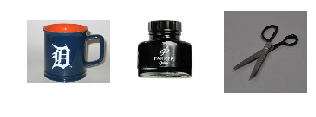

[ 도메인 추정결과 ]
추정확률분포 [22,63,15] => 추정 amazon : 정답 amazon => O
추정확률분포 [22,62,15] => 추정 amazon : 정답 amazon => O
추정확률분포 [22,62,15] => 추정 amazon : 정답 dslr => X
[ 상품 추정결과 ]
추정확률분포 [ 3, 4, 2, 3, 3, 3, 4, 4,...] => 추정 mobile_phone : 정답 mug => X
추정확률분포 [ 3, 4, 2, 3, 3, 3, 4, 4,...] => 추정 mobile_phone : 정답 pen => X
추정확률분포 [ 3, 4, 2, 3, 3, 3, 4, 4,...] => 추정 mobile_phone : 정답 scissors => X


In [9]:
om2 = CnnBasicModel('office31_model_2', od, 
               [['conv', {'ksize':3, 'chn':6, 'actfunc':'sigmoid'}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':12, 'actfunc':'sigmoid'}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':24, 'actfunc':'sigmoid'}], 
                ['avg', {'stride':3}]])
om2.exec_all(epoch_count = 10, report = 2)

Model office31_model_3 train started:
    Epoch 2: cost=3.433, accuracy=0.710+0.283/0.720+0.260 (113/113 secs)
    Epoch 4: cost=3.156, accuracy=0.732+0.330/0.760+0.330 (113/226 secs)
    Epoch 6: cost=2.887, accuracy=0.757+0.384/0.760+0.280 (111/337 secs)
    Epoch 8: cost=2.423, accuracy=0.845+0.466/0.860+0.390 (134/471 secs)
    Epoch 10: cost=2.155, accuracy=0.853+0.516/0.850+0.380 (129/600 secs)
Model office31_model_3 train ended in 600 secs:
Model office31_model_3 test report: accuracy = 0.808+0.365, (8 secs)

Model office31_model_3 Visualization


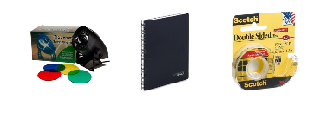

[ 도메인 추정결과 ]
추정확률분포 [ 0,99, 0] => 추정 amazon : 정답 amazon => O
추정확률분포 [ 4,87, 9] => 추정 amazon : 정답 amazon => O
추정확률분포 [ 3,96, 1] => 추정 amazon : 정답 amazon => O
[ 상품 추정결과 ]
추정확률분포 [ 1, 0, 0, 1, 0, 1, 0, 0,...] => 추정 letter_tray : 정답 desk_lamp => X
추정확률분포 [ 5, 0, 0, 1, 1, 0, 1, 0,...] => 추정 paper_notebook : 정답 paper_notebook => O
추정확률분포 [ 3, 1, 0, 0, 0, 2, 0, 0,...] => 추정 tape_dispenser : 정답 tape_dispenser => O


In [10]:
om3 = CnnBasicModel('office31_model_3', od, 
               [['conv', {'ksize':3, 'chn':6, 'actfunc':'tanh'}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':12, 'actfunc':'tanh'}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':24, 'actfunc':'tanh'}], 
                ['avg', {'stride':3}]])
om3.exec_all(epoch_count = 10, report = 2)